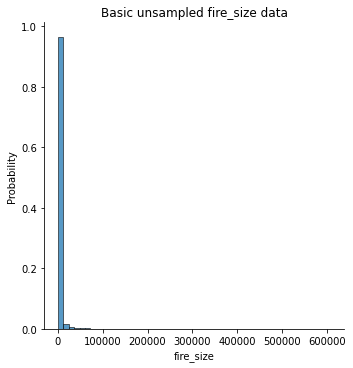

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats.distributions as dstr
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sampling import pps, accept_reject

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

enc = LabelEncoder()
df['stat_cause_descr_num'] = enc.fit_transform(df['stat_cause_descr'])

params = stats.norm.fit(df['fire_size'])
x = np.linspace(100, 300, 50)
sns.displot(data=df, x='fire_size',  bins=50, stat='probability')
plt.plot(x, stats.norm.pdf(x, params[0], params[1]), label='expon')
plt.title('Basic unsampled fire_size data')
plt.show()

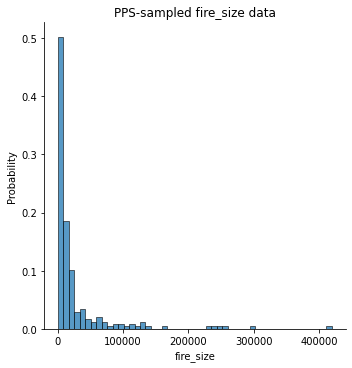

/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/task3/sampling.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  if r_m <= (prob_needed/prob_current):
/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/task3/sampling.py:47: RuntimeWarning: invalid value encountered in double_scalars
  if r_m <= (prob_needed/prob_current):


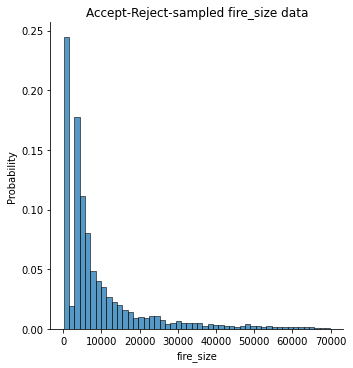

In [2]:
### fire_size sampling

M = 0.0001
df_sm_pps = pps(df, 'fire_size', M)

sns.displot(data=df_sm_pps, x='fire_size',  bins=50, stat='probability')
plt.title('PPS-sampled fire_size data')
plt.show()

df_sm_ar, params = accept_reject(df, 'fire_size', dstr.norm, M)

sns.displot(data=df_sm_ar, x='fire_size',  bins=50, stat='probability')
plt.title('Accept-Reject-sampled fire_size data')
plt.show()

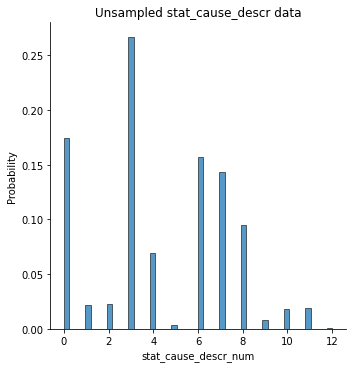

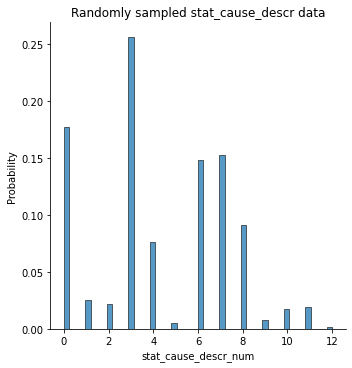

In [20]:
### stat_cause_descr sampling

M = 0.0001

sns.displot(data=df.sample(frac=0.1), x='stat_cause_descr_num', stat='probability')
plt.title('Unsampled stat_cause_descr data')
plt.show()

sns.displot(data=df.sample(frac=0.1), x='stat_cause_descr_num', stat='probability')
plt.title('Randomly sampled stat_cause_descr data')
plt.show()

/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/task3/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


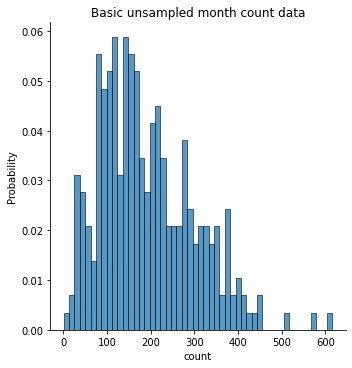

In [16]:
### Sampling amount of fires in a month

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    return df_clean

dfn = preprocess_missing_weather_data(df)

dfn['day'] = pd.to_datetime(dfn['disc_clean_date']).map(lambda x: x.day)
cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
fire_count_columns =["disc_pre_year", "disc_pre_month"] + [ x + '30' for x in cont_columns_prefix]

df_fires_count = dfn.groupby(['disc_pre_year', 'disc_pre_month']).size().reset_index().rename({0: 'count'}, axis=1)

data_fire_count = dfn.sort_values(['disc_pre_year', 'disc_pre_month', 'day'],
    ascending=False).drop_duplicates(['disc_pre_year', 'disc_pre_month'], keep='first')[fire_count_columns]

df_count = df_fires_count.merge(data_fire_count)

sns.displot(data=df_count, x='count',  bins=50, stat='probability')
plt.title('Basic unsampled month count data')
plt.show()

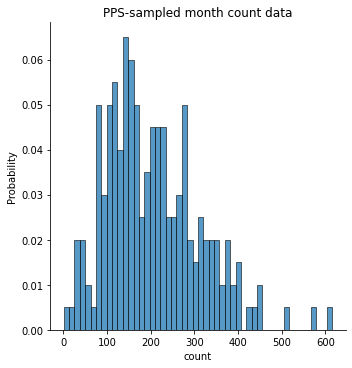

/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/task3/sampling.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  if r_m <= (prob_needed/prob_current):


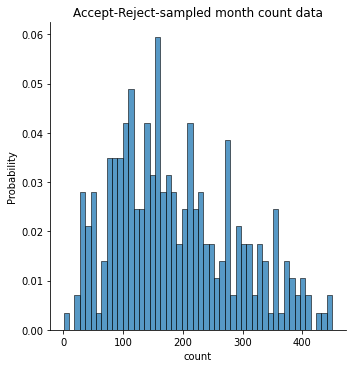

In [15]:
M = 0.1
df_sm_pps = pps(df_count, 'count', M)

sns.displot(data=df_sm_pps, x='count',  bins=50, stat='probability')
plt.title('PPS-sampled month count data')
plt.show()

df_sm_ar, params = accept_reject(df_count, 'count', dstr.norm, M)

sns.displot(data=df_sm_ar, x='count',  bins=50, stat='probability')
plt.title('Accept-Reject-sampled month count data')
plt.show()